In [24]:
# Import library data loading
import pandas as pd
import numpy as np

# Import library visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Import library preprocessing
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\62811\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\62811\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\62811\AppData\Roaming\nltk_data...


True

# **Data Loading**

In [25]:
# Membuat dataframe
df = pd.read_csv('FAQ.csv')

# Atur lebar dataframe
pd.set_option('display.max_colwidth', 250)

In [26]:
# Menampilkan 5 data teratas
df.head()

,Question,Answer
0,Bagaimanakah cara menjual mobil di CARSOME?,CARSOME Indonesia menawarkan cara baru menjual mobil sehingga anda dapat menerima harga terbaik untuk setiap penjualan mobil anda. Tidak perlu lagi anda harus mengeluarkan biaya untuk mengiklankan mobil anda dan juga menghemat waktu karena anda t...
1,Mengapa menggunakan CARSOME untuk menjual mobil saya?,"CARSOME Indonesia adalah cara tercepat dan termudah untuk menjual mobil anda! Anda bisa mendapatkan nilai jual mobil terbaik sesuai kondisi mobil dari tim survey kami sehingga anda dapat menghemat banyak waktu dan biaya, , , Keuntungan menggunaka..."
2,Apakah itu survey?,Survey adalah proses pengecekan kondisi mobil anda dimana inspektor berpengalaman kami akan melakukan 175 titik poin inspeksi pada mobil dan juga melakukan test-drive mobil anda untuk mengetahui kondisi mobil anda lebih lanjut. Survey mobil anda ...
3,Bagaimana jika saya ingin menjual mobil namun mobil masih dalam masa kredit?,"Apabila mobil anda masih dalam masa kredit, kami akan menghitung serta mengkalkulasi terlebih dahulu sisa kredit mobil anda apakah cocok dengan harga penawaran terbaik untuk mobil anda. Apabila ya, kami akan membantu anda untuk menjual mobil anda..."
4,Bagaimanakah cara membuat jadwal survey?,"Setelah memasukkan data-data mobil dan data-data pribadi anda, anda akan dihubungi oleh tim kami untuk pembuatan jadwal survey pada hari dan waktu yang memudahkan anda. Survey akan dilakukan di tempat kediaman anda atau tempat lainnya yang anda t..."


In [27]:
# Menampilkan 5 data terbawah
df.tail()

,Question,Answer
109,Berapa nilai diskon yang berhak saya dapatkan?,"Anda berhak mendapatkan:\xa0, Anda berhak mendapatkan:, < Rp 150.999.999 Diskon Rp 2.000.000\xa0Rp 151.000.000-Rp 250.999.999 Diskon 3.500.000\xa0> Rp 251.000.000 Diskon 5.000.000\xa0, < Rp 150.999.999 Diskon Rp 2.000.000\xa0, Rp 151.000.000-Rp 2..."
110,Jenis mobil apa saja yang dapat diterima untuk tukar tambah?,"CARSOME menerima tukar tambah mobil keluaran dari tahun 2007-2021, dengan CC di mulai dari 1000-3000cc, Matic & Automatic. Untuk info lebih lengkap silakan berbicara dengan konsultan kami dan mereka akan membantu Anda selama proses berlangsung., ..."
111,Bisakah diskon tukar tambah dialihkan ke teman atau keluarga?,"Ya, Anda dapat mengalihkan diskon tukar tambah kepada teman atau anggota keluarga Anda. Silahkan hubungi CARSOME Consultant kami dan mereka akan siap membantu Anda selama proses berlangsung., Ya, Anda dapat mengalihkan diskon tukar tambah kepada ..."
112,Saya sudah menggunakan diskon tukar tambah di mobil yang saya pesan tapi saya mau membatalkan pesanan. Apakah saya masih bisa menggunakan diskon tukar tambah pada pemesanan lain?,"Ya, diskon akan otomatis kembali ke Akun Anda dan dapat digunakan untuk pembelian berikutnya. Diskon tukar tambah berlaku selama 30 hari dari tanggal Anda menjual mobil pada kami., Ya, diskon akan otomatis kembali ke Akun Anda dan dapat digunakan..."
113,Bisakah saya mengkombinasikan diskon tukar tambah dengan promo lain di CARSOME atau voucher?,"Ya, voucher dapat dikombinasikan. Silakan hubungi CARSOME Consultant kami dan mereka akan membantu Anda., Ya, voucher dapat dikombinasikan. Silakan hubungi CARSOME Consultant kami dan mereka akan membantu Anda."


**Melihat informasi dataset**

In [28]:
# Mengecek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  114 non-null    object
 1   Answer    114 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


Dari dataframe dan basic info di atas kita dapat menarik informasi sebagai berikut :
1. Terdapat 2 kolom dan 114 baris
2. Tipe data pada masing - masing kolom sudah sesuai dengan nilai yang ditampilkan
3. Tidak terdapat missing values pada masing - masing kolom

**Mengecek data duplikat**

In [29]:
# Melihat data duplikat
df.duplicated().sum()

0

Dari informasi diatas kita tidak menemukan adanya data duplikat ini akan memudahkan kita dalam melakukan proses selanjutnya

**Mengecek missing value**

In [30]:
# mengecek missing value
df.isna().sum()

Question    0
Answer      0
dtype: int64

Dari informasi diatas kita tidak menemukan adanya missing value ini menandakan kualitas data yang kita miliki bagus dan akan mempercepat kita dalam melakukan proses selanjutnya.

# **Explorartory Data Analysis**

**Melihat distribusi data**

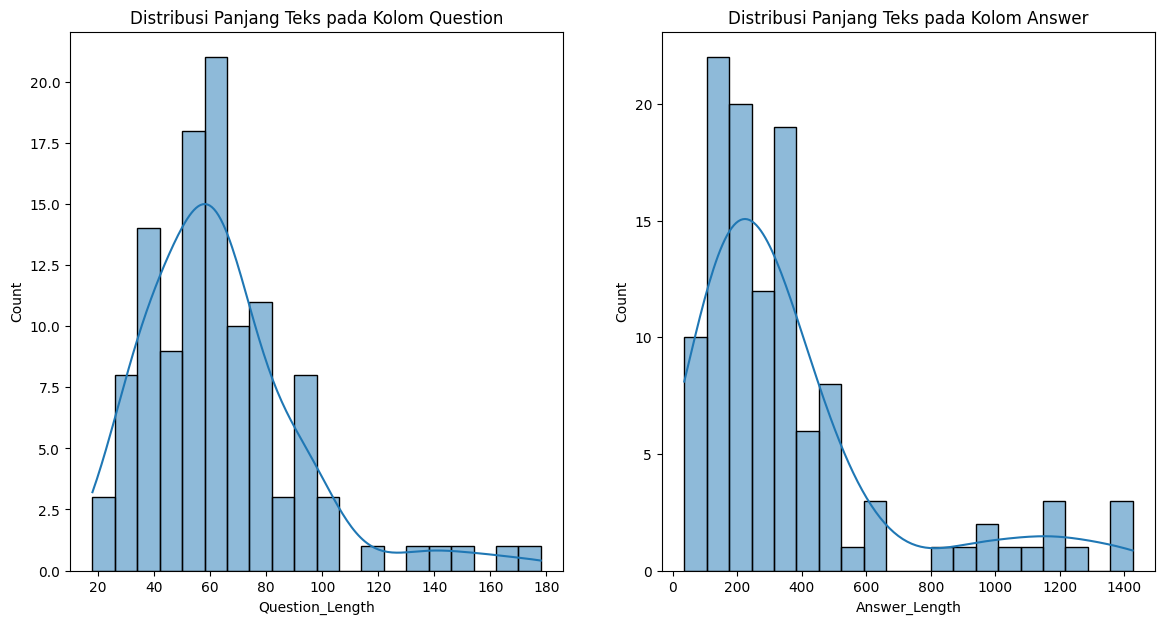

In [31]:
# Menampilkan distribusi panjang teks pada kolom 'Question' dan 'Answer'
df['Question_Length'] = df['Question'].apply(len)
df['Answer_Length'] = df['Answer'].apply(len)

plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.histplot(df['Question_Length'], bins=20, kde=True)
plt.title('Distribusi Panjang Teks pada Kolom Question')

plt.subplot(1, 2, 2)
sns.histplot(df['Answer_Length'], bins=20, kde=True)
plt.title('Distribusi Panjang Teks pada Kolom Answer')
plt.show()

Dari gambar histogram di atas, kita dapat menarik beberapa kesimpulan mengenai distribusi panjang teks pada kolom `Question` dan `Answer`:

### Distribusi Panjang Teks pada Kolom Question
1. **Rentang Panjang Teks:**
   - Panjang teks pada kolom `Question` sebagian besar berada dalam rentang 20 hingga 120 kata.
   - Mayoritas teks berada dalam rentang 40 hingga 80 kata, dengan puncak distribusi sekitar 60 kata.

2. **Distribusi:**
   - Distribusi panjang teks cenderung normal dengan puncak distribusi di sekitar 60 kata.
   - Teks yang lebih panjang dari 120 kata jarang ditemui.

### Distribusi Panjang Teks pada Kolom Answer
1. **Rentang Panjang Teks:**
   - Panjang teks pada kolom `Answer` menunjukkan distribusi yang lebih lebar dibandingkan dengan `Question`.
   - Mayoritas teks berada dalam rentang 0 hingga 600 kata, dengan beberapa teks yang lebih panjang hingga 1400 kata.

2. **Distribusi:**
   - Distribusi panjang teks menunjukkan puncak di sekitar 150-200 kata.
   - Ada beberapa teks yang sangat panjang (lebih dari 600 kata), tetapi frekuensinya sangat rendah.
   - Distribusi panjang teks pada `Answer` lebih variatif dengan adanya beberapa outliers yang cukup panjang.

### Kesimpulan :
- Panjang teks untuk `Question` lebih konsisten dan cenderung lebih pendek dibandingkan dengan `Answer`.
- `Answer` memiliki variasi panjang yang lebih besar, mencerminkan bahwa jawaban cenderung lebih bervariasi dalam panjangnya, mungkin karena jawaban sering kali memerlukan penjelasan yang lebih rinci.

Distribusi ini memberikan gambaran bahwa dalam dataset ini, pertanyaan biasanya pendek dan langsung, sementara jawaban lebih panjang dan beragam dalam panjangnya.

**Mengecek outlier**

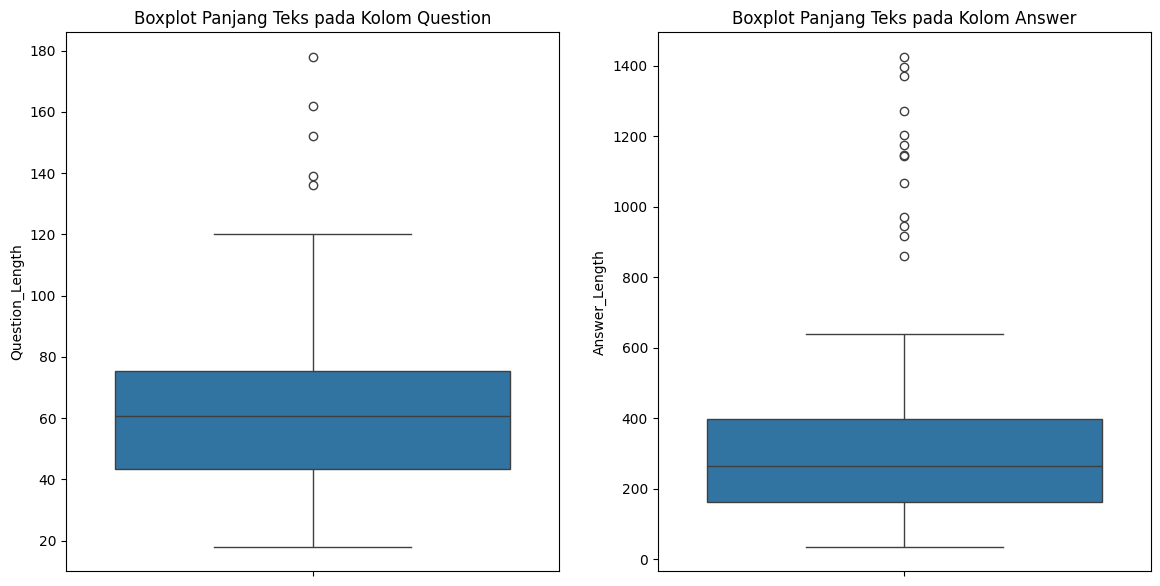

In [32]:
# Menampilkan boxplot untuk panjang teks pada kolom 'Question' dan 'Answer'
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Question_Length'])
plt.title('Boxplot Panjang Teks pada Kolom Question')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Answer_Length'])
plt.title('Boxplot Panjang Teks pada Kolom Answer')
plt.show()

Dari gambar diatas kita melihat masih ada outlier dari 2 kolom tersebut ini nantinya akan dianalisa terlebih dahulu untuk melakukan tindakan selanjutnya. karena kita memiliki data yang terbatas.

**Menampilkan beberapa pertanyaan**

In [33]:
# Menampilkan beberapa pertanyaan dan jawaban yang paling panjang
print("Pertanyaan Terpanjang:\n", df.loc[df['Question_Length'].idxmax(), 'Question'])
print("Jawaban Terpanjang:\n", df.loc[df['Answer_Length'].idxmax(), 'Answer'])

Pertanyaan Terpanjang:
 Saya sudah menggunakan diskon tukar tambah di mobil yang saya pesan tapi saya mau membatalkan pesanan. Apakah saya masih bisa menggunakan diskon tukar tambah pada pemesanan lain?
Jawaban Terpanjang:
 Jika terkendala tidak menerima email set up password saat registrasi, coba ikuti langkah-langkah berikut:, Periksa Email Anda yang Terdaftar: Pastikan alamat email yang Anda berikan saat pendaftaran akurat dan dieja dengan benar. Pastikan tidak ada kesalahan ketik atau kesalahan pada alamat email.Periksa Konektivitas Internet Anda: Pastikan bahwa perangkat Anda telah terhubung ke jaringan yang stabil.Periksa Kotak Masuk dan Spam: Setelah memeriksa alamat email dan koneksi jaringan, periksa kotak masuk email dan folder spam Anda untuk email pengaturan kata sandi. Terkadang, email mungkin masuk ke folder spam, jadi penting untuk memeriksa keduanya., Periksa Email Anda yang Terdaftar: Pastikan alamat email yang Anda berikan saat pendaftaran akurat dan dieja dengan bena

**Melihat kata - kata yang sering muncul dari kolom Question**

Text(0.5, 1.0, 'Word Cloud untuk Kolom Question')

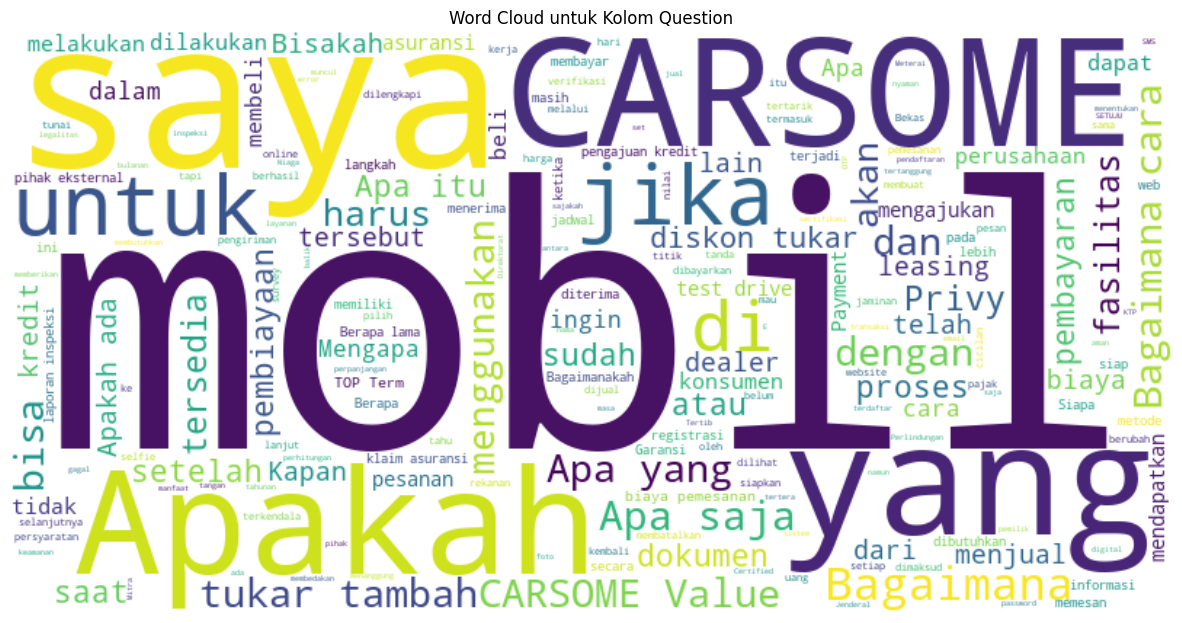

In [34]:
# Word Cloud untuk kolom 'Question'
wordcloud_q = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Question']))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_q, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Kolom Question')

Dari gambar word cloud di atas, kita dapat menarik beberapa kesimpulan mengenai kata-kata yang paling sering muncul dalam kolom `Question`:

### Kesimpulan dari Word Cloud untuk Kolom Question:
1. **Kata-Kata yang Paling Sering Muncul:**
   - Kata-kata yang paling menonjol (dengan ukuran terbesar) adalah `mobil`, `CARSOME`, `saya`, `Apakah`, `yang`, `untuk`, `di`, `jika`, `dan`, `bagaimana`. Ini menunjukkan bahwa kata-kata ini paling sering digunakan dalam pertanyaan.
   - Kata `mobil` dan `CARSOME` adalah yang paling menonjol, menunjukkan bahwa pertanyaan-pertanyaan banyak berfokus pada topik mobil dan perusahaan CARSOME.

2. **Topik Pertanyaan:**
   - Banyak pertanyaan berfokus pada topik yang berkaitan dengan mobil, seperti `tukar tambah`, `pembiayaan`, `leasing`, `test drive`, `harga`, dan `proses`.
   - Ada juga banyak pertanyaan tentang proses dan fasilitas yang disediakan oleh CARSOME, seperti `diskon`, `pembayaran`, `dokumen`, `pengajuan kredit`, `inspeksi`, dan `jaminan`.

3. **Kata Tanya:**
   - Kata tanya seperti `Apakah`, `Bagaimana`, `Apa`, `Berapa`, `Mengapa`, dan `Kapan` sering muncul, menunjukkan bahwa pertanyaan banyak berkaitan dengan penjelasan, cara kerja, prosedur, dan detail terkait layanan atau produk CARSOME.

### Kesimpulan :
- Word cloud ini menggambarkan fokus utama dari pertanyaan pengguna, yaitu seputar mobil dan layanan yang ditawarkan oleh CARSOME.
- Kata-kata kunci yang sering muncul menunjukkan bahwa banyak pertanyaan berorientasi pada informasi produk, proses, dan layanan yang diberikan.
- Adanya kata-kata tanya mengindikasikan bahwa pengguna mencari klarifikasi dan detail spesifik mengenai berbagai aspek layanan CARSOME.

Word cloud ini memberikan gambaran visual yang jelas tentang fokus dan kebutuhan informasi dari para pengguna yang mengajukan pertanyaan, serta area utama yang menjadi perhatian mereka.

**Melihat kata - kata yang sering muncul dari kolom Answer**

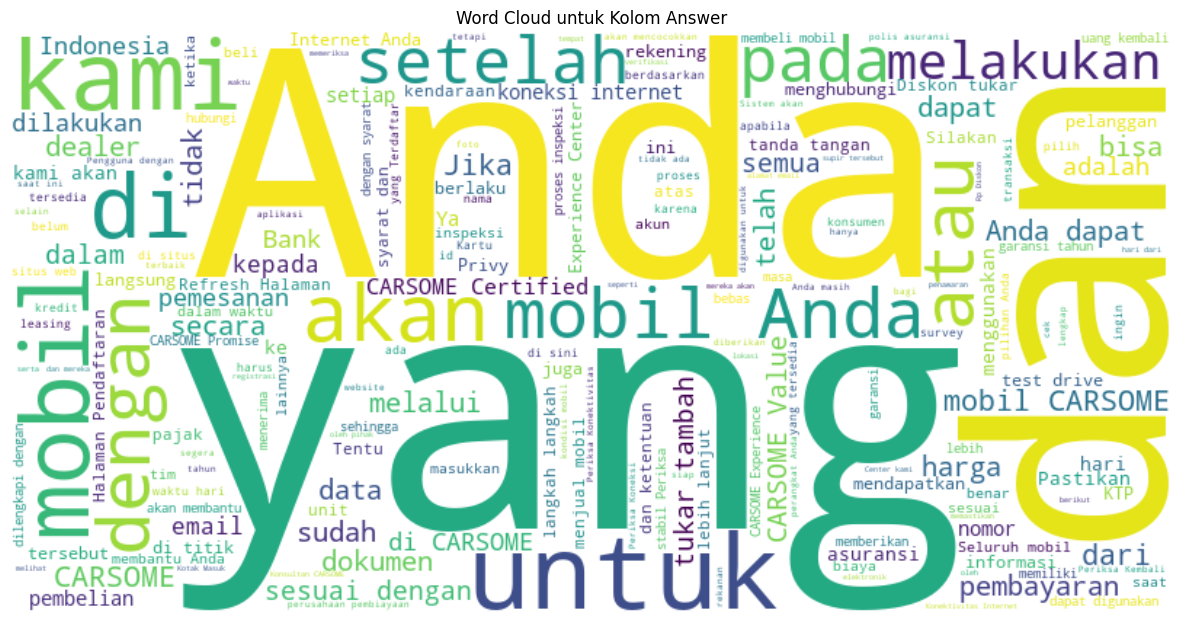

In [35]:
# Word Cloud untuk kolom 'Answer'
wordcloud_a = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Answer']))
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud_a, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Kolom Answer')
plt.show()

Dari gambar word cloud di atas, kita dapat menarik beberapa kesimpulan mengenai kata-kata yang paling sering muncul dalam kolom `Answer`:

### Kesimpulan dari Word Cloud untuk Kolom Answer:
1. **Kata-Kata yang Paling Sering Muncul:**
   - Kata-kata yang paling menonjol (dengan ukuran terbesar) adalah `Anda`, `yang`, `akan`, `mobil`, `kami`, `untuk`, `setelah`, `pada`, dan `atau`. Ini menunjukkan bahwa kata-kata ini paling sering digunakan dalam jawaban.
   - Kata `Anda` dan `yang` adalah yang paling menonjol, menunjukkan fokus jawaban yang ditujukan kepada pengguna (Anda) dan menjelaskan sesuatu (yang).

2. **Topik Jawaban:**
   - Jawaban sering kali berfokus pada hal-hal yang berkaitan dengan mobil, seperti `CARSOME`, `tukar tambah`, `harga`, `dokumen`, `asuransi`, dan `pembayaran`.
   - Kata-kata seperti `setelah`, `akan`, `telah`, dan `pada` menunjukkan bahwa jawaban sering memberikan informasi tentang proses, langkah-langkah, dan waktu.

3. **Fokus pada Pengguna:**
   - Penggunaan kata `Anda` yang sangat menonjol menunjukkan bahwa jawaban sangat berorientasi pada memberikan informasi langsung kepada pengguna.
   - Kata `kami` juga menonjol, menunjukkan bahwa jawaban sering kali menyertakan informasi tentang apa yang akan dilakukan atau disediakan oleh CARSOME.

### Kesimpulan :
- Word cloud ini menggambarkan bahwa jawaban dalam dataset sangat berfokus pada pengguna, dengan banyak penggunaan kata `Anda` untuk memberikan informasi langsung.
- Jawaban sering kali mencakup topik-topik yang berkaitan dengan mobil dan layanan terkait, serta menjelaskan proses, langkah-langkah, dan informasi detail lainnya.
- Ada banyak informasi mengenai tindakan atau layanan yang akan dilakukan atau diberikan oleh CARSOME kepada pengguna, seperti yang ditunjukkan oleh kata-kata `kami` dan `akan`.

Word cloud ini memberikan gambaran visual yang jelas tentang fokus dan struktur jawaban yang diberikan, menunjukkan orientasi yang kuat pada informasi yang relevan dan langsung kepada pengguna.

**Menghapus kata - kata yang berbahasa inggris**

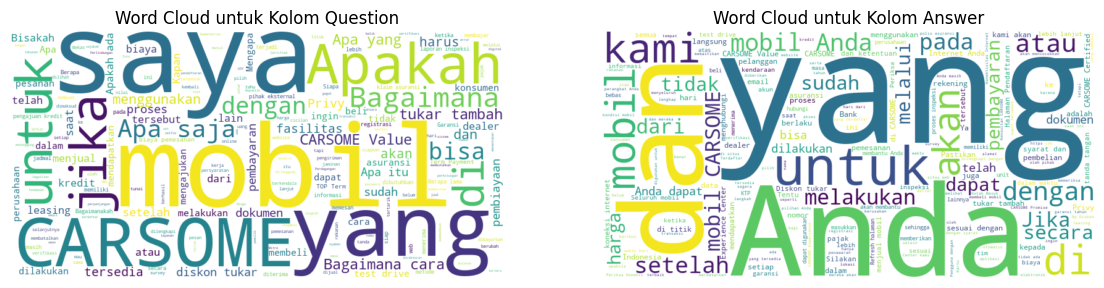

In [36]:
# Menghapus stopwords dan menampilkan Word Cloud untuk kolom 'Question' dan 'Answer'
stop_words = set(stopwords.words('english'))

# Fungsi untuk menghapus stopwords
def remove_stopwords(text):
    words = word_tokenize(text)
    words_filtered = [word for word in words if word.lower() not in stop_words and word.isalnum()]
    return ' '.join(words_filtered)

df['Question_Clean'] = df['Question'].apply(remove_stopwords)
df['Answer_Clean'] = df['Answer'].apply(remove_stopwords)

plt.figure(figsize=(14, 7))
wordcloud_q = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Question_Clean']))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_q, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Kolom Question')

wordcloud_a = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Answer_Clean']))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_a, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud untuk Kolom Answer')
plt.show()

Dari word cloud diatas kita sudah menampilkan hasil terbaru tanpa adanya kata yang berbahasa inggris, ini akan memudahkan kita nantinya dalam melakukan analisa karena memiliki kata - kata dalam 1 bahasa saja.

**Menampilkan kata - kata yang sering muncul dari kolom Question dan Answer**

In [38]:
from collections import Counter
# Menampilkan 5 kata yang paling sering muncul dalam kolom 'Question' dan 'Answer'
def get_top_n_words(corpus, n=None):
    words = word_tokenize(corpus)
    words = [word for word in words if word.lower() not in stop_words and word.isalnum()]
    word_freq = Counter(words)
    return word_freq.most_common(n)

top_5_question_words = get_top_n_words(' '.join(df['Question']), 5)
top_5_answer_words = get_top_n_words(' '.join(df['Answer']), 5)

print("5 Kata yang Paling Sering Muncul dalam Kolom Question:")
for word, freq in top_5_question_words:
    print(f"{word}: {freq}")

print("\n5 Kata yang Paling Sering Muncul dalam Kolom Answer:")
for word, freq in top_5_answer_words:
    print(f"{word}: {freq}")

5 Kata yang Paling Sering Muncul dalam Kolom Question:
mobil: 57
saya: 54
yang: 39
CARSOME: 38
Apakah: 26

5 Kata yang Paling Sering Muncul dalam Kolom Answer:
Anda: 185
yang: 158
mobil: 145
dan: 128
CARSOME: 112


**Menampilkan dalam bentuk plot hasil diatas**

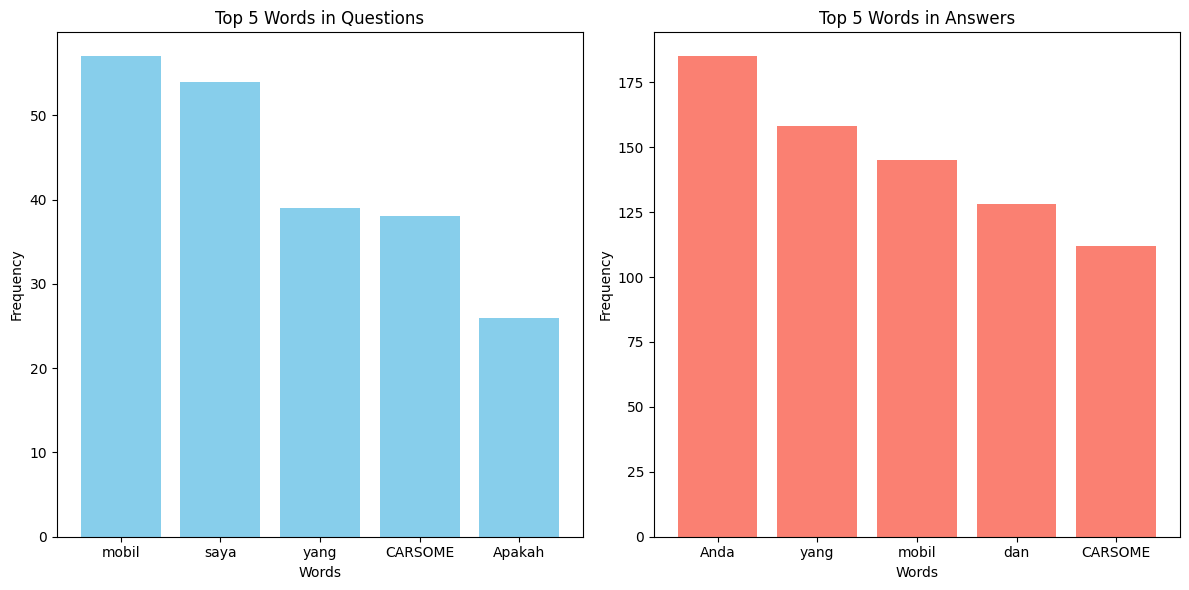

In [40]:
# Memasukkan data yang ingin di tampilkan
top_5_question_words = [('mobil', 57), ('saya', 54), ('yang', 39), ('CARSOME', 38), ('Apakah', 26)]
top_5_answer_words = [('Anda', 185), ('yang', 158), ('mobil', 145), ('dan', 128), ('CARSOME', 112)]

# Ekstrak kata dan frekuensi
question_words, question_freqs = zip(*top_5_question_words)
answer_words, answer_freqs = zip(*top_5_answer_words)

# Plot untuk Question Words
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(question_words, question_freqs, color='skyblue')
plt.title('Top 5 Words in Questions')
plt.xlabel('Words')
plt.ylabel('Frequency')

# Plot untuk Answer Words
plt.subplot(1, 2, 2)
plt.bar(answer_words, answer_freqs, color='salmon')
plt.title('Top 5 Words in Answers')
plt.xlabel('Words')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Dari grafik batang yang menunjukkan 5 kata paling sering muncul dalam kolom `Question` dan `Answer`, kita dapat menarik beberapa kesimpulan:

### Top 5 Kata dalam Kolom `Question`:
   - Kata `mobil` dan `CARSOME` menonjol, menunjukkan fokus utama pertanyaan adalah tentang mobil dan layanan yang disediakan oleh CARSOME.
   - Kata `saya` menunjukkan banyak pertanyaan berorientasi pada pengalaman pribadi atau kebutuhan individu.
   - Kata tanya `Apakah` mengindikasikan banyak pertanyaan yang mencari konfirmasi atau penjelasan.

### Top 5 Kata dalam Kolom `Answer`:
   - Kata `Anda` sangat menonjol, menunjukkan jawaban ditujukan langsung kepada pengguna dan berfokus pada kebutuhan atau tindakan yang harus dilakukan oleh pengguna.
   - Kata `yang` sering digunakan untuk menjelaskan atau merinci informasi.
   - Kata `mobil` dan `CARSOME` juga muncul sering dalam jawaban, menunjukkan fokus jawaban pada produk (mobil) dan layanan yang disediakan oleh CARSOME.
   - Kata `dan` menunjukkan banyak jawaban memberikan informasi yang terdiri dari beberapa poin atau langkah.

### Kesimpulan :
- **Keselarasan Kata:** Kata `mobil` dan `CARSOME` sering muncul baik dalam pertanyaan maupun jawaban, menunjukkan konsistensi topik antara apa yang ditanyakan pengguna dan informasi yang diberikan dalam jawaban.
- **Orientasi Pengguna:** Kata `Anda` dalam jawaban menunjukkan jawaban sangat berorientasi pada pengguna, memberikan informasi yang spesifik dan relevan kepada mereka.
- **Kata Tanya dan Jawaban Detail:** Pertanyaan sering menggunakan kata tanya seperti `Apakah`, dan jawaban cenderung memberikan detail dengan menggunakan kata seperti `yang` dan `dan`.

Grafik ini memberikan wawasan tentang fokus komunikasi dalam dataset, menunjukkan bahwa topik utama berkisar pada mobil dan layanan CARSOME, dengan jawaban yang sangat berorientasi pada pengguna dan memberikan detail yang komprehensif.